
1. **Project Title**: Handwritten Recognition

    **Project Author**: Joshua Kabwanga

2. **Libraries Used**: 
    - `os`
    - `cv2`
    - `numpy`
    - `tensorflow`
    - `matplotlib.pyplot`
3. **Data**:
    - The MNIST dataset is used for training and testing the model to predict house number.
    - An external image (`house_number.png`) is used for prediction.
4. **Model**:
    - A neural network model is created using TensorFlow's Keras API.
    - The model consists of a flatten layer, two dense layers with ReLU activation, and an output layer with softmax activation.
    - The model is compiled with the Adam optimizer and sparse categorical cross-entropy loss.
    - The model is trained for 10 epochs.
    - The model achieves a validation loss of `0.1136` and an accuracy of `0.9747`.
5. **Prediction**:
    - The model is used to predict the digit in an external image, and the predicted digit is displayed.

In [1]:
#!pip install opencv-python

import python libreries

In [2]:
import os
import cv2 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
train_new_model = True

if train_new_model:
    mnist = tf.keras.datasets.mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    #normalize the data

    X_train = tf.keras.utils.normalize(X_train, axis = 1)
    X_test = tf.keras.utils.normalize(X_test, axis = 1)

    #create a neural network model
    #let train the model

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=128, activation = tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=128, activation = tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=10, activation = tf.nn.softmax))

    #compile the model
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=(['accuracy']))

    #fit the model for training

    model.fit(X_train, y_train, epochs=10)

    #Evaluate the model
    val_loss = model.evaluate(X_test,y_test)
    print(val_loss)

    #saving the model
    model.save('handwritten_digits.keras')
else:
    #load the model
    model = tf.keras.models.load_model('handwritten_digits.model')



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8642 - loss: 0.4680
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9655 - loss: 0.1099
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9772 - loss: 0.0703
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9819 - loss: 0.0525
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9882 - loss: 0.0375
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9898 - loss: 0.0297
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9919 - loss: 0.0226
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9936 - loss: 0.0189
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9947 - loss: 0.0154
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9962 - loss: 0.0123
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9724 - loss: 0.1245
[0.11359608173370361, 0.9746999740600586]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
The number is probably a 5


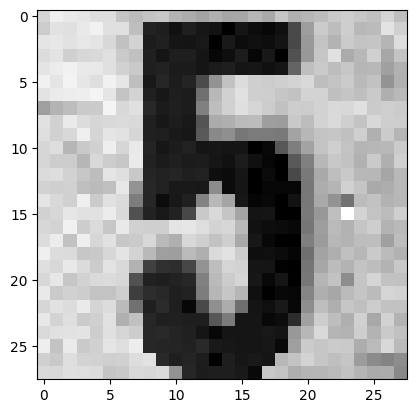

In [4]:
# Load an external image
image_path = 'house_number.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Preprocess the image to match the input shape of the model
img = cv2.resize(img, (28, 28))
img = np.invert(img)
img = img / 255.0
img = img.reshape(1, 28, 28, 1)

# Use the model to predict the image
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

print(f'The number is probably a {predicted_digit}')
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()

### Recommendation:
1. **Model Improvement**:
    - Consider experimenting with different architectures, such as adding convolutional layers, to improve the model's performance.
    - Perform hyperparameter tuning to find the optimal learning rate, batch size, and number of epochs.
2. **Data Augmentation**:
    - Apply data augmentation techniques (e.g., rotation, scaling, translation) to the training data to make the model more robust.
3. **Evaluation**:
    - Evaluate the model using additional metrics such as precision, recall, and F1-score.
    - Perform cross-validation to ensure the model's performance is consistent across different subsets of the data.
4. **Deployment**:
    - Save the trained model in a format suitable for deployment (e.g., TensorFlow SavedModel format).
    - Create a user-friendly interface for uploading images and displaying predictions.
5.